In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path1=r"C:/Users/User/Documents/Project 2/carvan_train.csv"
path2=r"C:/Users/User/Documents/Project 2/carvan_test.csv"

#reading training data
bd_train=pd.read_csv(path1)
#reading test data
bd_test=pd.read_csv(path2)

In [3]:
#Now we will concat these datasets for data preprocesssing 
bd_test['V86']=np.NaN
bd_train['data']="train"
bd_test['data']="test"
bd_test=bd_test[bd_train.columns]
bd_all=pd.concat([bd_train,bd_test],axis=0)

In [4]:
bd_all.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V78,V79,V80,V81,V82,V83,V84,V85,V86,data
0,33,1,3,2,8,0,5,1,3,7,...,0,0,1,0,0,0,0,0,0.0,train
1,37,1,2,2,8,1,4,1,4,6,...,0,0,1,0,0,0,0,0,0.0,train
2,37,1,2,2,8,0,4,2,4,3,...,0,0,1,0,0,0,0,0,0.0,train
3,9,1,3,3,3,2,3,2,4,5,...,0,0,1,0,0,0,0,0,0.0,train
4,40,1,4,2,10,1,4,1,4,7,...,0,0,1,0,0,0,0,0,0.0,train


In [5]:
#V86 is our dependent(target) variable
bd_all['V86'].value_counts()

0.0    5474
1.0     348
Name: V86, dtype: int64

In [6]:
#we check for all the columns with their data type and unique values
list(zip(bd_all.columns,bd_all.dtypes,bd_all.nunique()))

[('V1', dtype('int64'), 40),
 ('V2', dtype('int64'), 9),
 ('V3', dtype('int64'), 6),
 ('V4', dtype('int64'), 6),
 ('V5', dtype('int64'), 10),
 ('V6', dtype('int64'), 10),
 ('V7', dtype('int64'), 10),
 ('V8', dtype('int64'), 6),
 ('V9', dtype('int64'), 10),
 ('V10', dtype('int64'), 10),
 ('V11', dtype('int64'), 8),
 ('V12', dtype('int64'), 10),
 ('V13', dtype('int64'), 10),
 ('V14', dtype('int64'), 10),
 ('V15', dtype('int64'), 10),
 ('V16', dtype('int64'), 10),
 ('V17', dtype('int64'), 10),
 ('V18', dtype('int64'), 10),
 ('V19', dtype('int64'), 10),
 ('V20', dtype('int64'), 6),
 ('V21', dtype('int64'), 10),
 ('V22', dtype('int64'), 10),
 ('V23', dtype('int64'), 10),
 ('V24', dtype('int64'), 10),
 ('V25', dtype('int64'), 10),
 ('V26', dtype('int64'), 10),
 ('V27', dtype('int64'), 10),
 ('V28', dtype('int64'), 10),
 ('V29', dtype('int64'), 10),
 ('V30', dtype('int64'), 10),
 ('V31', dtype('int64'), 10),
 ('V32', dtype('int64'), 10),
 ('V33', dtype('int64'), 9),
 ('V34', dtype('int64'), 1

In [7]:
bd_all['V1'].nunique()

40

In [8]:
round(bd_all.groupby("V2")['V86'].mean(),2)

V2
1     0.06
2     0.07
3     0.00
4     0.00
5     0.00
6     0.00
7     0.00
8     0.00
10    0.00
Name: V86, dtype: float64

In [9]:
#In V2 column we only make dummy of 2 values
bd_all['V2_1']=np.where(bd_all['V2']==1,1,0)
bd_all['V2_2']=np.where(bd_all['V2']==2,1,0)
bd_all.drop(['V2'],axis=1,inplace=True)

In [10]:
#these are our categorical columns and we will make dummies of these variables
["V1","V4","V5","V6","V10","V42","V44"]

['V1', 'V4', 'V5', 'V6', 'V10', 'V42', 'V44']

In [11]:
bd_all['V1'].value_counts()

33    1401
38     569
8      546
39     542
9      460
3      433
23     376
36     373
35     362
41     355
34     325
24     324
31     318
13     302
11     286
10     271
32     234
37     233
1      218
6      209
12     194
30     190
22     169
2      148
29     139
40     137
25     129
4       90
26      79
27      77
7       72
5       70
20      42
28      41
21      29
18      27
16      25
17      13
15       7
19       7
Name: V1, dtype: int64

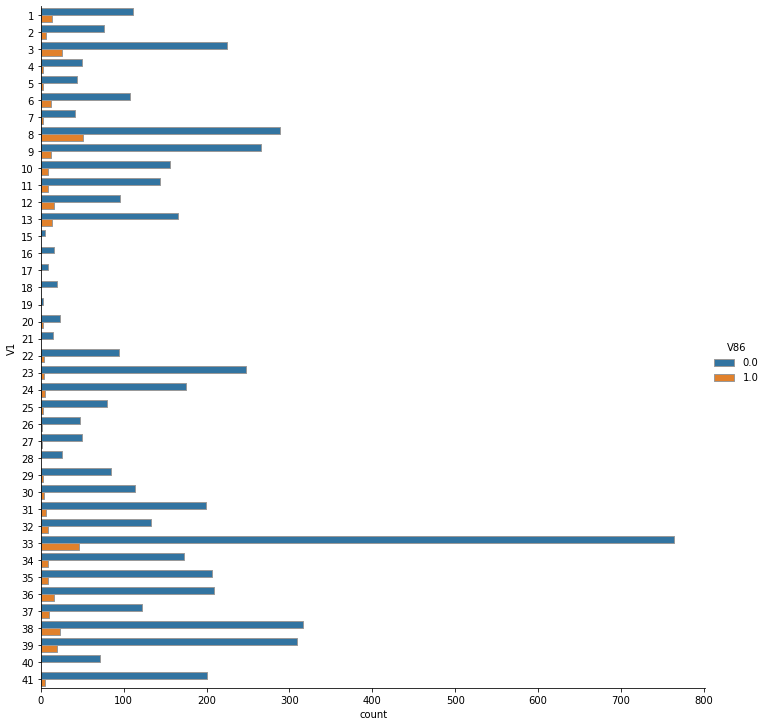

In [12]:
#plt.figure(figsize=(30,9))
sns.catplot(y="V1", hue="V86", kind="count",height=10,
            edgecolor=".6",
            data=bd_all)

# Column V4=Average age:

1 20-30 years
2 30-40 years
3 40-50 years
4 50-60 years
5 60-70 years
6 70-80 years

In [13]:
bd_all['V4'].value_counts()

3    5154
2    2409
4    1777
5     329
1     104
6      49
Name: V4, dtype: int64

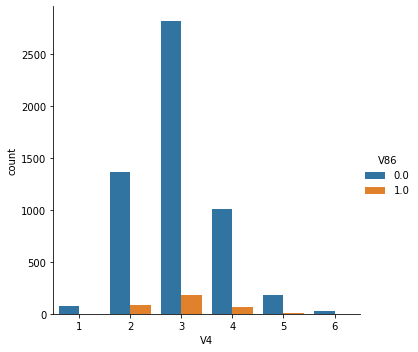

In [14]:
# Lets Visualize Average age V4
sns.catplot(x = "V4",data = bd_all, kind = "count",hue = "V86",height = 5)

# Column V5= Customer Main Type

1 Successful hedonists
2 Driven Growers
3 Average Family
4 Career Loners
5 Living well
6 Cruising Seniors
7 Retired and Religeous
8 Family with grown ups
9 Conservative families
10 Farmers

In [15]:
bd_all['V5'].value_counts()

8     2694
3     1513
9     1111
1      959
5      940
7      881
2      827
10     492
6      326
4       79
Name: V5, dtype: int64

In [16]:
round(bd_all.groupby("V5")['V86'].mean(),3)

V5
1     0.087
2     0.131
3     0.067
4     0.000
5     0.026
6     0.020
7     0.036
8     0.057
9     0.063
10    0.018
Name: V86, dtype: float64

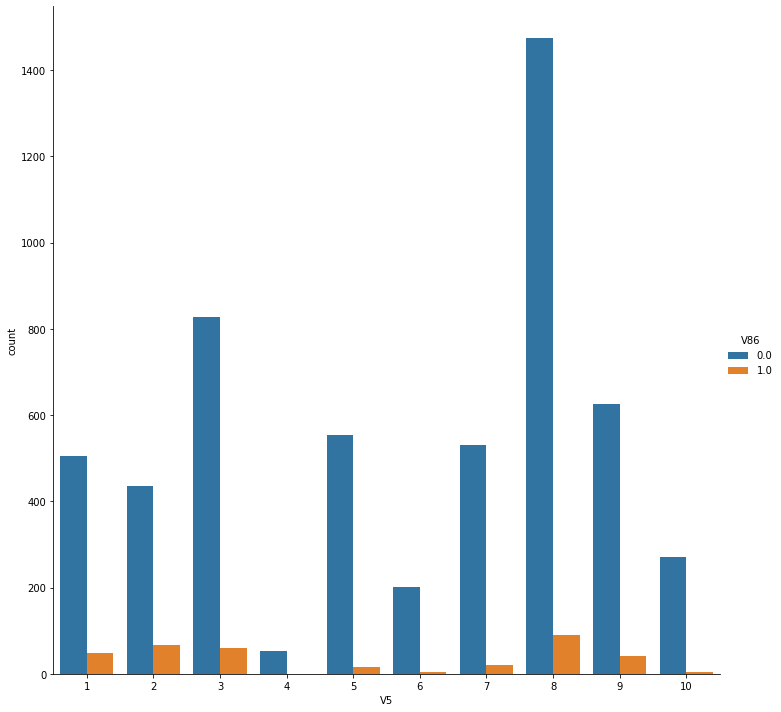

In [17]:
#Lets Visualize V5
sns.catplot(x="V5",kind="count",hue="V86",height=10,data=bd_all)

In [ ]:
"V6","V10","V15","V42","V44"

# Column V6: Roman Catholic

0 0%
1 1 - 10%
2 11 - 23%
3 24 - 36%
4 37 - 49%
5 50 - 62%
6 63 - 75%
7 76 - 88%
8 89 - 99%
9 100%

In [18]:
bd_all['V6'].value_counts()

0    5420
1    2744
2    1213
3     243
4     123
5      30
6      25
7      11
9      10
8       3
Name: V6, dtype: int64

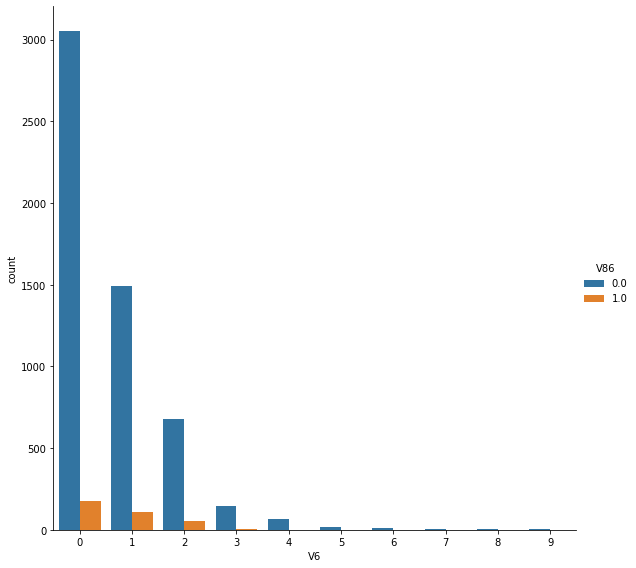

In [19]:
#Lets Visualize column V6
sns.catplot(x="V6",hue="V86",height=8,kind="count",data=bd_all)

In [20]:
#Column V10=Married
bd_all['V10'].value_counts()

7    2800
6    2015
5    1628
9    1345
8     603
4     550
3     402
2     252
1     119
0     108
Name: V10, dtype: int64

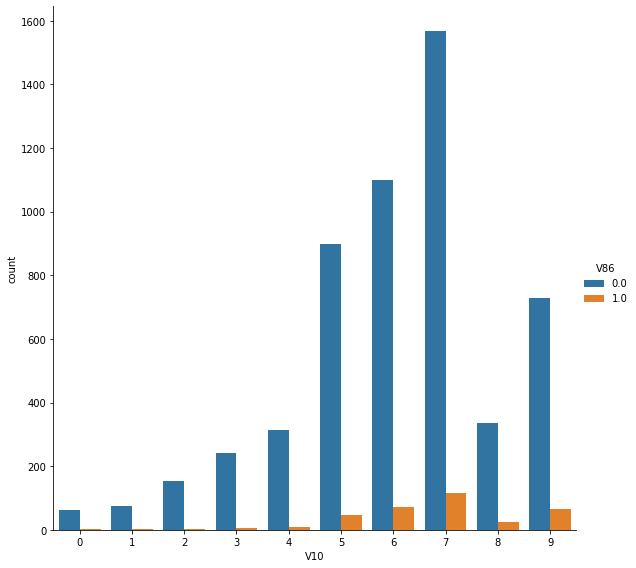

In [21]:
#Let's Visualize column V10
sns.catplot(x="V10",hue="V86",height=8,kind="count",data=bd_all)

In [22]:
#Column V42=Average Income
bd_all['V42'].value_counts()

3    3232
4    3063
5    1268
2    1110
6     646
7     228
8     121
1      78
9      38
0      38
Name: V42, dtype: int64

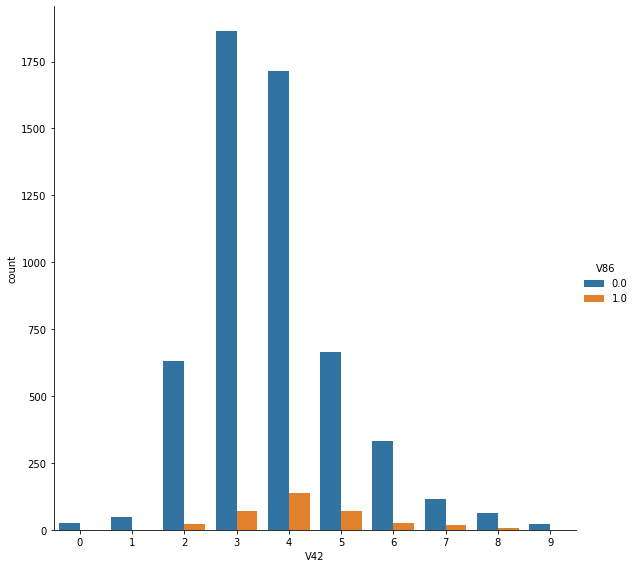

In [23]:
#Let's Visualize column V42
sns.catplot(x="V42",hue="V86",height=8,kind="count",data=bd_all)

In [24]:
#Column V44=Contribution private third party insurance
bd_all['V44'].value_counts()

0    5903
2    3562
1     341
3      16
Name: V44, dtype: int64

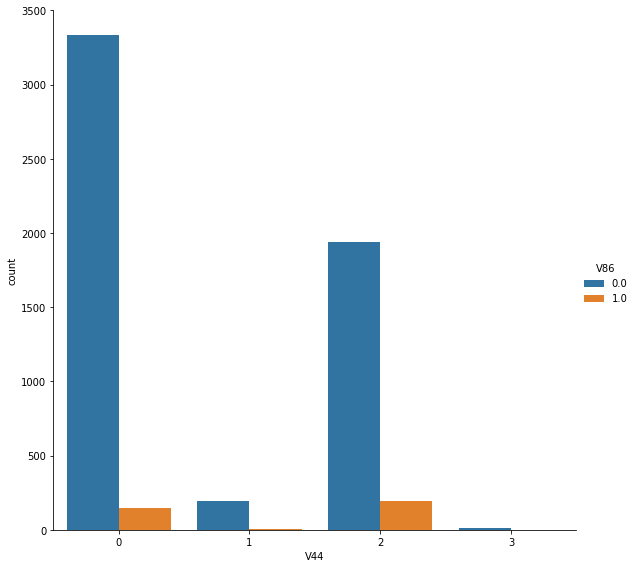

In [25]:
#Let's Visualize column V42
sns.catplot(x="V44",hue="V86",height=8,kind="count",data=bd_all)

In [26]:
#these are our categorical columns and we will make dummies of these variables
["V1","V4","V5","V6","V10","V42","V44"]

['V1', 'V4', 'V5', 'V6', 'V10', 'V42', 'V44']

In [27]:
cat_cols=["V1","V4","V5","V6","V10","V42","V44"]

for col  in cat_cols:
    freqs=bd_all[col].value_counts()
    k=freqs.index[freqs>100][:-1]
    for cat in k:
        name=str(col)+"_"+str(cat)
        bd_all[name]=(bd_all[col]==cat).astype(int)
    del bd_all[col]
    print(col)

V1
V4
V5
V6
V10
V42
V44


In [28]:
bd_all.head()

,V3,V7,V8,V9,V11,V12,V13,V14,V15,V16,...,V10_2,V10_1,V42_3,V42_4,V42_5,V42_2,V42_6,V42_7,V44_0,V44_2
0,3,5,1,3,0,2,1,2,6,1,...,0,0,0,1,0,0,0,0,1,0
1,2,4,1,4,2,2,0,4,5,0,...,0,0,0,0,1,0,0,0,0,1
2,2,4,2,4,2,4,4,4,2,0,...,0,0,1,0,0,0,0,0,0,1
3,3,3,2,4,2,2,2,3,4,3,...,0,0,0,1,0,0,0,0,1,0
4,4,4,1,4,1,2,2,4,4,5,...,0,0,0,0,0,0,1,0,1,0


In [29]:
#Check for Null values in our data
bd_all.isnull().sum()

V3       0
V7       0
V8       0
V9       0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
V31      0
V32      0
V33      0
V34      0
V35      0
V36      0
        ..
V4_5     0
V5_8     0
V5_3     0
V5_9     0
V5_1     0
V5_5     0
V5_7     0
V5_2     0
V5_10    0
V6_0     0
V6_1     0
V6_2     0
V6_3     0
V10_7    0
V10_6    0
V10_5    0
V10_9    0
V10_8    0
V10_4    0
V10_3    0
V10_2    0
V10_1    0
V42_3    0
V42_4    0
V42_5    0
V42_2    0
V42_6    0
V42_7    0
V44_0    0
V44_2    0
Length: 140, dtype: int64

In [30]:
#Impute null values by mean,only in train data 
for col in bd_all.columns:
    if (col not in ['V86','data'])& (bd_all[col].isnull().sum()>0):
        bd_all.loc[bd_all[col].isnull(),col]=bd_all.loc[bd_all['data']=='train',col].mean()

In [31]:
#Data preprocessing is done and now split our data into training and testing 
bd_train=bd_all[bd_all['data']=="train"]
del bd_train['data']
bd_test=bd_all[bd_all['data']=="test"]
bd_test.drop(['V86','data'],axis=1,inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
bd_train1,bd_train2=train_test_split(bd_train,test_size=0.2,
                                     random_state=2,
                                     stratify = bd_train["V86"])

In [ ]:
#bd_train1=80% data is used for training
#bd_train2=20% data is used for testing and check our model performance on train data

In [36]:
#80% training data
x_train=bd_train1.drop(['V86'],1)
y_train=bd_train1['V86']
#20% testing data
x_test=bd_train2.drop(['V86'],1)
y_test=bd_train2['V86']

# Logistics Regression

In [37]:
#parameters for logistics regression 
params={'class_weight':['balanced',None],
        'penalty':['l1','l2']}

In [38]:
model=LogisticRegression(fit_intercept=True)

In [39]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring="roc_auc")

In [40]:
grid_search.fit(x_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this war

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [41]:
grid_search.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
logr=grid_search.best_estimator_

In [43]:
#fit on training data 
logr.fit(x_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
list(zip(x_train.columns,logr.coef_))

[('V3',
  array([-1.41609990e-02, -5.78073475e-06,  1.33789023e-02, -3.63415859e-02,
         -6.99519472e-02, -1.81472417e-02, -1.16738363e-01, -1.21671773e-01,
         -8.23541186e-02,  0.00000000e+00, -1.16128840e-01, -2.26766333e-01,
          0.00000000e+00,  3.96553310e-02, -1.00524719e-01,  1.01728621e-01,
          1.75162418e-02,  1.94778716e-02,  7.76036004e-02,  0.00000000e+00,
          0.00000000e+00,  1.22694335e-01,  0.00000000e+00, -2.21594836e-01,
         -2.21239403e-01,  5.08240270e-02,  7.07969424e-02, -3.85942880e-03,
         -2.03516864e-01, -2.46168273e-01,  1.67614274e-02,  3.98832632e-02,
          0.00000000e+00,  1.19187955e-01, -2.53619474e-01,  7.41871757e-02,
          0.00000000e+00, -2.43899922e-01,  2.47114250e-01, -2.00337557e-02,
         -7.46214844e-02, -4.52382324e-02,  3.33436061e-01,  8.19062439e-02,
         -4.49676740e-01, -1.11819819e-01, -2.05936829e-01,  0.00000000e+00,
          1.77901374e-01,  2.23969940e-01,  1.67083482e-01,  0.00000

In [45]:
#prediction on 20% splitted test data....y_predicted
train_prediction=logr.predict_proba(x_test)[:,1]
#Real 
real_value=y_test

In [46]:
train_prediction

array([0.05485975, 0.14875051, 0.03189437, ..., 0.01562311, 0.10562536,
       0.04061121])

In [47]:
cutoffs=np.linspace(0.01,0.99,99)

In [48]:
KS_all=[]
for cutof in cutoffs:
        predicted=(train_prediction>cutof).astype(int)
        
        TP=((predicted==1) & (real_value==1)).sum()
        TN=((predicted==0) & (real_value==0)).sum()
        FP=((predicted==1) & (real_value==0)).sum()
        FN=((predicted==0) & (real_value==1)).sum()
    
        P=TP+FN
        N=TN+FP
        #KS cutoff
        KS=(TP/P)-(FP/N)
        #Recall
        RK=(TP/(TP+FN))
        #precision
        PR=(TP/(TP+FP))
        #F-beta score (beta=2)
        FB=(1+2**2)*PR*RK/((2**2)*PR+RK)
        print("FB ",FB)
    
        KS_all.append(KS)


FB  0.2712264150943396
FB  0.29829545454545453
FB  0.3142227122381478
FB  0.3205918618988902
FB  0.33012379642365886
FB  0.33382789317507416
FB  0.326797385620915
FB  0.31523642732049034
FB  0.29906542056074764
FB  0.30511811023622043
FB  0.2510460251046025
FB  0.25219298245614036
FB  0.24137931034482757
FB  0.25240384615384615
FB  0.24875621890547261
FB  0.23195876288659792
FB  0.22546419098143236
FB  0.20718232044198892
FB  0.18361581920903955
FB  0.1729106628242075
FB  0.1461988304093567
FB  0.1492537313432836
FB  0.1371951219512195
FB  0.1393188854489164
FB  0.12539184952978055
FB  0.11075949367088608
FB  0.09554140127388536
FB  0.06535947712418301
FB  0.06557377049180328
FB  0.05016722408026756
FB  0.01694915254237288
FB  0.01694915254237288
FB  0.01694915254237288
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in longlong_scalars


In [49]:
mycutoff=cutoffs[KS_all==max(KS_all)][0]
mycutoff

0.060000000000000005

In [50]:
lm_hardclasses = (train_prediction>mycutoff).astype(int)
lm_hardclasses

array([0, 1, 0, ..., 0, 1, 0])

# Let's build confusion matrix

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(real_value,lm_hardclasses)

array([[746, 349],
       [ 25,  45]], dtype=int64)

In [53]:
#Another way of building confusion matrix
pd.crosstab(real_value,lm_hardclasses)

col_0,0,1
V86,,
0.0,746,349
1.0,25,45


In [54]:
#Accuracy on train data
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,train_prediction)

0.7206196999347684

In [ ]:
#We got 72% accuracy on train data,This is too low so now we will move to another algorithms

In [55]:
#Now we build our model on whole data
#we split our whole training data into predictors and target
X_TRAIN=bd_train.drop(['V86'],axis=1)
Y_TRAIN=bd_train['V86']

In [56]:
#fit on whole train data
logr.fit(X_TRAIN,Y_TRAIN)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
#Prediction on whole test data
test_prediction=logr.predict_proba(bd_test)[:,1]

In [58]:
test_prediction

array([0.01394454, 0.26271044, 0.07678531, ..., 0.16509613, 0.08785252,
       0.08837829])

In [59]:
test_classes=(test_prediction>mycutoff).astype(int)

In [60]:
pd.DataFrame(test_prediction).to_csv("MYLOGISTICSREG.csv",index=False)

In [61]:
from sklearn.metrics import fbeta_score

In [62]:
#Fbeta Score
fbeta_score(y_test,lm_hardclasses,beta=2)

0.33382789317507416

# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [64]:
#Random Forest classifier
RFModel=RandomForestClassifier()


In [65]:
#parameters for random forest 
param_dist = {"n_estimators":[100,200,300,500,700,1000],
              "max_features": [5,10,20,25,30,35],
              "bootstrap": [True, False],
              'class_weight':[None,'balanced'], 
               'criterion':['entropy','gini'],
               'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                }



In [66]:
n_iter_search=10
random_search=RandomizedSearchCV(RFModel,param_dist,n_iter=n_iter_search,scoring='roc_auc',cv=10)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [67]:
rf_model=random_search.best_estimator_

In [68]:
#Fit 80% splitted train data using random search best estimator
rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
rf_train_predicted = rf_model.predict_proba(x_test)[:,1]
real=y_test

In [70]:
cutoffs=np.linspace(0.01,0.99,99)

In [71]:
KS_all = []
for cutoff in cutoffs:
    predicted = (rf_train_predicted>cutoff).astype(int)
    
    TP = ((predicted==1) & (real==1)).sum()
    TN = ((predicted==0) & (real==0)).sum()
    FP = ((predicted==1) & (real==0)).sum()
    FN = ((predicted==0) & (real==1)).sum()
    
    P = TP + FN
    N = TN + FP
    
    KS = (TP/P)-(FP/N)
    KS_all.append(KS)

In [72]:
mycutoff = cutoffs[KS_all == max(KS_all)][0]
mycutoff

0.06999999999999999

In [73]:
rf_hardclasses = (rf_train_predicted > mycutoff).astype(int)

In [74]:
df = pd.DataFrame(list(zip(real,rf_hardclasses)),columns=["Real","Predicted"])


In [75]:
#Lets build confusion matrix
pd.crosstab(df["Real"], df["Predicted"])

Predicted,0,1
Real,,
0.0,798,297
1.0,25,45


In [76]:
#Accuracy
roc_auc_score(real,rf_hardclasses)

0.685812133072407

In [77]:
#F-beta score
fbeta_score(y_test,lm_hardclasses,beta=2)

0.33382789317507416

In [78]:
#Fit on whole training data
rf_model.fit(X_TRAIN,Y_TRAIN)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
test_score=rf_model.predict_proba(bd_test)[:,1]
test_classes=(test_score>mycutoff).astype(int)
pd.DataFrame(test_classes).to_csv("RANDOMFORESTSolution.csv",index=False)